# Extraire les données et les  valeurs des points clés

In [11]:
import cv2           
import numpy as np   
import os            
from matplotlib import pyplot as plt



import time          
import mediapipe as mp  #pour la detection de corps
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical  




# Initialiser MediaPipe Holistic, qui est une solution pour la détection du corps entier
mp_holistic = mp.solutions.holistic 

# Initialiser MediaPipe Drawing Utils, qui contient des utilitaires pour dessiner les annotations
mp_drawing = mp.solutions.drawing_utils




def mediapipe_detection(image, model):
    # Convertir l'image de BGR en RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    
    # Rendre l'image non modifiable (non writeable)
    image.flags.writeable = False                  # Image is no longer writeable
    
    # Faire la prédiction en utilisant le modèle MediaPipe
    results = model.process(image)                 # Make prediction
    
    # Rendre l'image modifiable à nouveau
    image.flags.writeable = True                   # Image is now writeable
    
    # Convertir l'image de RGB en BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR CONVERSION RGB 2 BGR
    
    # Retourner l'image et les résultats de la prédiction
    return image, results




def draw_landmarks(image, results):
    # Dessiner les connexions du visage
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    
    # Dessiner les connexions de la pose (corps)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    
    # Dessiner les connexions de la main gauche
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    
    # Dessiner les connexions de la main droite
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

    
# draw_landmarks -> Function does not return the image but rather applies the landmark visualizations to the current image in place    



def draw_styled_landmarks(image, results):
    # Dessiner les connexions du visage
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             # Spécifications pour colorer les points de repère (points) du visage
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             # Spécifications pour colorer les connexions (lignes) du visage
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Dessiner les connexions de la pose (corps)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             # Spécifications pour colorer les points de repère (points) du corps
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             # Spécifications pour colorer les connexions (lignes) du corps
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Dessiner les connexions de la main gauche
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             # Spécifications pour colorer les points de repère (points) de la main gauche
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             # Spécifications pour colorer les connexions (lignes) de la main gauche
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Dessiner les connexions de la main droite  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             # Spécifications pour colorer les points de repère (points) de la main droite
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             # Spécifications pour colorer les connexions (lignes) de la main droite
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

    
#we are just formatting or updating our draw landmark function(that's not complusory though, u can use only standard drwa_landmark func)    
    



import cv2
import mediapipe as mp

# Initialiser la capture vidéo à partir de la webcam
cap = cv2.VideoCapture(0)

# Définir le modèle MediaPipe Holistic avec des seuils de détection et de suivi
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Lire le flux vidéo
        ret, frame = cap.read()
        
        if not ret:
            continue
        
        # Faire les détections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Dessiner les points de repère
        draw_styled_landmarks(image, results)  # Utiliser la fonction améliorée pour dessiner les points de repère avec des couleurs différentes
        
        # Afficher à l'écran
        cv2.imshow('OpenCV Feed', image)

        # Quitter proprement
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Libérer la capture vidéo et fermer les fenêtres
cap.release()
cv2.destroyAllWindows()


# Compter le nombre de points de repère détectés sur la pose (corps)
num_pose_landmarks = len(results.pose_landmarks.landmark) 


results


# Appeler la fonction pour dessiner les points de repère sur le visage, le corps, et les mains
draw_landmarks(frame, results)




pose = []               
# Pour chaque point de repère de la pose détecté, crée un tableau numpy avec les coordonnées x, y, z et la visibilité, puis ajoute-le à la liste 'pose'.
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)




# Crée un tableau numpy plat avec les coordonnées x, y, z et la visibilité des points de repère de la pose; sinon, initialise un tableau de zéros de taille 132 si aucun point de repère n'est détecté.
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)

# Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère du visage; sinon, initialise un tableau de zéros de taille 1404 si aucun point de repère n'est détecté.
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

# Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère de la main gauche; sinon, initialise un tableau de zéros de taille 63 si aucun point de repère n'est détecté.
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

# Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère de la main droite; sinon, initialise un tableau de zéros de taille 63 si aucun point de repère n'est détecté.
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)



def extract_keypoints(results):
    # Crée un tableau numpy plat avec les coordonnées x, y, z et la visibilité des points de repère de la pose; sinon, initialise un tableau de zéros de taille 132 si aucun point de repère n'est détecté.
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    
    # Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère du visage; sinon, initialise un tableau de zéros de taille 1404 si aucun point de repère n'est détecté.
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    
    # Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère de la main gauche; sinon, initialise un tableau de zéros de taille 63 si aucun point de repère n'est détecté.
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    
    # Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère de la main droite; sinon, initialise un tableau de zéros de taille 63 si aucun point de repère n'est détecté.
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
    # Concatène tous les tableaux de points de repère (pose, visage, main gauche, main droite) en un seul tableau numpy.
    return np.concatenate([pose, face, lh, rh])



result_test = extract_keypoints(results)



np.save('0', result_test)   
# en enregistrant chaque image sous forme de tableau numpy à l'intérieur de notre dossier 'MP_Data', nous aurons donc 30 tableaux numpy dans chaque dossier d'actions


np.load('0.npy')

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect, including Tunisian Sign Language actions in French (transliterated)
# Actions that we try to detect, including Tunisian Sign Language actions in French (transliterated)
actions = np.array([ 'n3ass','lunettes','je froid','3aslama', 'Chokran', 'Nhebbek', 'La',  'j aime', 'j aime pas', 'Nakel', 'Nchrob' ,  'Bahi',
      'Telephone',   's il te plait', 'pleur','fort', 'lissar','Waqtach',
    'Limine' , 'sghir', 'kbir', 'stop', 'sma3ni','fakar','chof'])





#Trente vidéos de données
no_sequences = 30

# Les vidéos dureront 30 images
sequence_length = 30


# Vérifie si le chemin de répertoire spécifié par DATA_PATH n'existe pas.
# Si le répertoire n'existe pas, il le crée.
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)



# Itère sur chaque action dans la liste d'actions
for action in actions: 
    # Pour chaque action, itère sur le nombre de séquences
    for sequence in range(no_sequences):
        try:
            # Essaye de créer un répertoire pour l'action et la séquence spécifiée dans DATA_PATH
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            # Ignore les erreurs (par exemple, si le répertoire existe déjà) et continue
            pass



label_map = {label:num for num, label in enumerate(actions)}




# Initialise deux listes vides pour stocker les séquences et les étiquettes
sequences, labels = [], []

# Itère à travers chaque action dans la liste d'actions
for action in actions:
    # Pour chaque action, itère à travers chaque séquence (vidéo)
    for sequence in range(no_sequences):
        # Crée une liste pour stocker les frames de la séquence actuelle
        window = []
        # Itère à travers chaque frame de la séquence
        for frame_num in range(sequence_length):
            # Charge les points de repère extraits (au format .npy) pour la frame courante
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            # Ajoute les points de repère à la fenêtre (séquence)
            window.append(res)
        # Ajoute la fenêtre (séquence complète) à la liste des séquences
        sequences.append(window)
        # Ajoute l'étiquette correspondant à l'action à la liste des étiquettes
        labels.append(label_map[action])


X = np.array(sequences)
y = to_categorical(labels).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

# creation et Evaluation les performances de model 

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten, Reshape
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Fonction pour construire le modèle CNN+LSTM
def build_cnn_lstm_model(input_shape):
    model = Sequential()
    
    # Convolutional Layers
    model.add(Conv1D(64, 3, activation='relu', padding='same', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(128, 3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(256, 3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2))
    
    # Flatten and LSTM Layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))  # Ajout d'une couche Dense pour redimensionner les données
    model.add(Reshape((1, 128)))  # Reshape pour préparer les données pour LSTM
    model.add(LSTM(128, return_sequences=False))
    
    # Couche de sortie
    model.add(Dense(10, activation='softmax'))  # Adaptez le nombre de classes selon votre problème
    
    return model

# Chargement et préparation des données
# X_train, X_test, y_train, y_test doivent être définis ici
# Assurez-vous que vos données sont déjà chargées et prétraitées

input_shape = (X_train.shape[1], X_train.shape[2])
cnn_lstm_model = build_cnn_lstm_model(input_shape)

# Extrait les caractéristiques
cnn_lstm_model.compile(optimizer='adam', loss='categorical_crossentropy')
features_train = cnn_lstm_model.predict(X_train)
features_test = cnn_lstm_model.predict(X_test)

# Encode les labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(np.argmax(y_train, axis=1))
y_test_encoded = label_encoder.transform(np.argmax(y_test, axis=1))

# Entraînement du modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(features_train, y_train_encoded)

# Classe pour l'extraction des caractéristiques CNN+LSTM
class CNN_LSTM_FeatureExtractor:
    def __init__(self, cnn_lstm_model):
        self.cnn_lstm_model = cnn_lstm_model

    def fit(self, X, y=None):
        return self  # Pas de traitement à faire ici

    def transform(self, X):
        return self.cnn_lstm_model.predict(X)

# Création du pipeline
pipeline = Pipeline([
    ('feature_extractor', CNN_LSTM_FeatureExtractor(cnn_lstm_model)),
    ('classifier', rf_model)
])

# Entraînement du pipeline
pipeline.fit(X_train, y_train_encoded)

# Évaluation du pipeline
y_pred = pipeline.predict(X_test)
print(classification_report(y_test_encoded, y_pred))


c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      0.50      0.67         2
           3       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       1.00      0.50      0.67         2
           7       0.00      0.00      0.00         1
           8       0.50      1.00      0.67         1
           9       0.67      0.67      0.67         3
          10       0.00      0.00      0.00         0
          11       1.00      1.00      1.00         3
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          14       1.00      0.50      0.67         2
          15       1.00      0.50      0.67         2
          16       1.00      1.00 

c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten, Reshape
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Évaluation du pipeline
y_pred = pipeline.predict(X_test)

# Rapport de classification
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))

# Matrice de confusion
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred))

# Précision globale
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.4f}")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report



# Compute precision, recall, and F1 score
precision = precision_score(y_test.argmax(axis=1), y_pred, average='weighted')
recall = recall_score(y_test.argmax(axis=1), y_pred, average='weighted')
f1 = f1_score(y_test.argmax(axis=1), y_pred, average='weighted')

conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test.argmax(axis=1), y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      0.50      0.67         2
           3       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       1.00      0.50      0.67         2
           7       0.00      0.00      0.00         1
           8       0.50      1.00      0.67         1
           9       0.67      0.67      0.67         3
          10       0.00      0.00      0.00         0
          11       1.00      1.00      1.00         3
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          14       1.00      0.50      0.67         2
          15       1.00      0.50      0.67         2
          16       1.00      1.00      1.00         2
          17       0.75      1.00      0.86         3
          18       1

c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

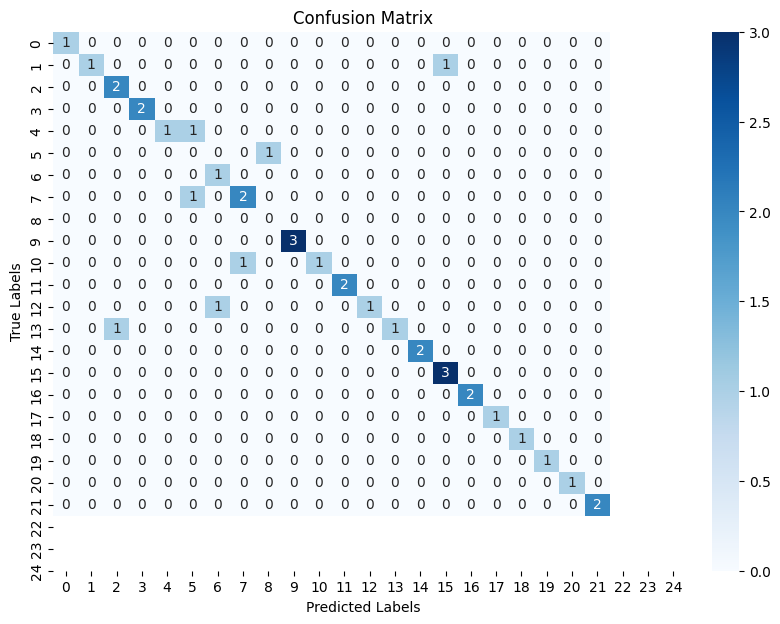

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      0.50      0.67         2
           3       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       1.00      0.50      0.67         2
           7       0.00      0.00      0.00         1
           8       0.50      1.00      0.67         1
           9       0.67      0.67      0.67         3
          10       0.00      0.00      0.00         0
          11       1.00      1.00      1.00         3
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          14       1.00      0.50      0.67         2
          15       1.00      0.50      0.67         2
          16       1.00      1.00      1.00         2
          17       0.75      1.00      0.86         3
          18       1.00      1.00      1.00         2
    

c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assurez-vous que y_test_encoded est sous forme d'entiers
y_test_encoded = np.argmax(y_test, axis=1)  # Si y_test est one-hot encoded

# Si y_pred est déjà un tableau d'entiers représentant les classes prédites, vous pouvez l'utiliser directement
# Pas besoin de np.argmax si y_pred est déjà en format de classe prédite

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Création de la carte thermique
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Rapport de classification
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))

# Précision globale
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.4f}")


# Test en temps reel